> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> At this project, I will be analysing the movie trends base on TMDb movie dataset from The Movie Database(TMDb). The project will focus on analysing movie popularity correlation over the years. I will be particularily interesting on finding the most popular movie and how it differ from movie with the least popularity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> First, we will be read into the dataset from uploaded tmdb movies file using `pd.read_csv('tmdb-movies.csv')`. Then, `.head()` outputs the first few rows of data into a neatly DataFrame frome the csv. 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The `.shape` shows the numbers of rows and the numbers of column on this DataFrame. Rows represents the number of movies, which is 10866 movies, and column represents the number of movie infos, like genre and director. 

In [3]:
df.shape

(10866, 21)

> `.describe()` outputs a DataFrame that shows the minimum, maximum, and mean of movies based ontheir popularity, budget, and revenue etc. 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

> `.info` reviews all 21 data columns on all 10866 movies. As you can see, some of the data has missing values.
Missing value columns:
-cast
-homepage
-ddirector
-tagline
-keywords
-overview
-genres
-production_companies

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Some variables will not be analysing in this project, such as id, release_year, keywords, tagline, overview, cast, budgect_adj, revenue_adj, and imdb_id.

In [6]:
df.drop(['cast', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [7]:
df.drop(['production_companies','director'], axis=1, inplace=True)

In [8]:
df.drop(['homepage'], axis=1, inplace=True)

> Some of the movie info in the new DataFrame after dropping variables we are not going to analysis in this project.

In [9]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


> `.hist()` shows histograms basd on variables we are going to analysis, like budget, popularity, revenue, vote_average, runtime, and etc. As we can see on the histogram, vote_average is mainly focus on the center and vote_count is skewed to the right. Many poeple voted after viewing movie and majority of them has a good opinion on those movies.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E1E71F9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025E2281F320>]], dtype=object)

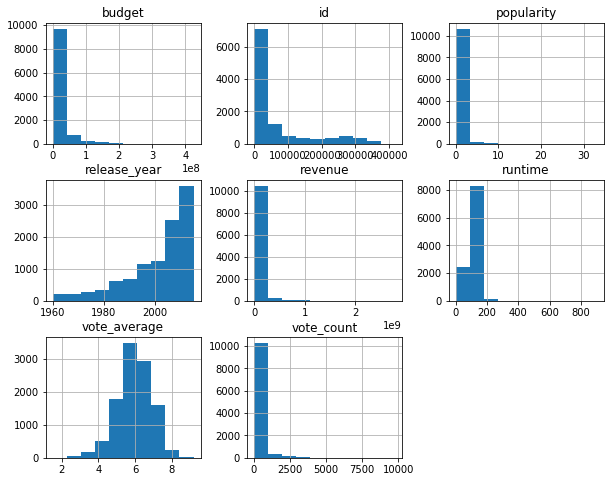

In [10]:
df.hist(figsize=(10, 8))

> Check to see if there is some missig values on the new data columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
tagline           8042 non-null object
keywords          9373 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


> It seems everyting is not too off place after detecting genres missing object value using `.isnull()`. Also, genres are not numerical values, we cannot find their means using `.mean()`.

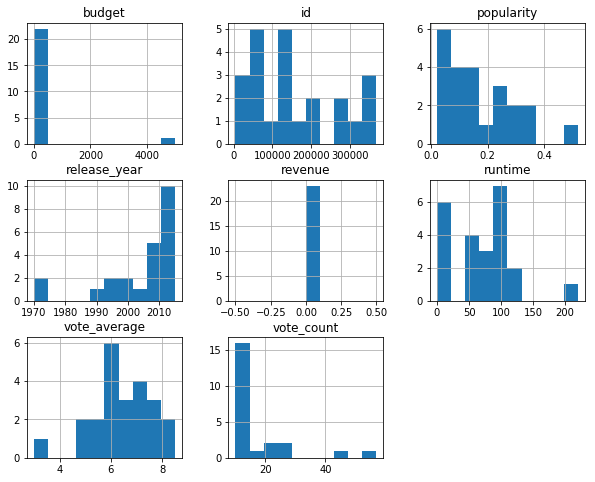

In [12]:
df[df.genres.isnull()].hist(figsize=(10, 8));

> Dropping null value under genres with NaN using `.dropna`. Now we left with 10843 rows instead of 10866 rows.

In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7321 entries, 0 to 10865
Data columns (total 15 columns):
id                7321 non-null int64
imdb_id           7321 non-null object
popularity        7321 non-null float64
budget            7321 non-null int64
revenue           7321 non-null int64
original_title    7321 non-null object
tagline           7321 non-null object
keywords          7321 non-null object
overview          7321 non-null object
runtime           7321 non-null int64
genres            7321 non-null object
release_date      7321 non-null object
vote_count        7321 non-null int64
vote_average      7321 non-null float64
release_year      7321 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 915.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Budget, Revenue, and Popularity correlatioin

> In this part of researh question, we will analysis if the budget of movie making and the return of revenue have a direct correlation on movie popularity.

In [14]:
budget = df.budget == True
return_revenue = df.budget ==False

In [15]:
df.popularity[budget].mean()

0.36110233333333336

In [16]:
df.popularity[return_revenue].mean()

0.38146530802675616

> Reading from below histogram, the return of revenue is overlapping with budget of movie making. They are both skewed to the right.

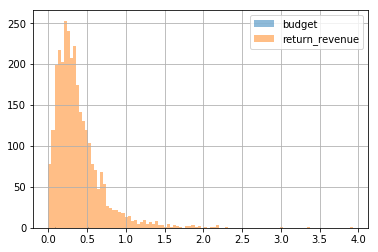

In [17]:
df.popularity[budget].hist(alpha=0.5, bins=100, label='budget')
df.popularity[return_revenue].hist(alpha=0.5, bins=100, label='return_revenue')
plt.legend();

> If we taking vote_average as one of the movie popularity factor, budget and movie popularity doesn't have as strong correlation as vote_average and popularity. The higher of vote_average the more popular the movie.

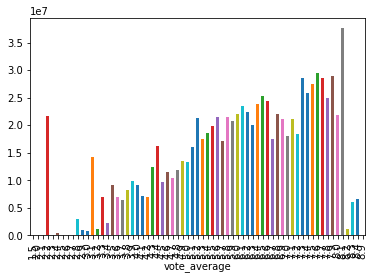

In [18]:
df.groupby('vote_average').budget.mean().plot(kind='bar');

### Research Movie runtime, vote average, and popularity

> In this part of the research, we are going to analysis if movie runtime and vote average have a stronger correlation with movie popularity. We are assuming popular movie has a higher vote average and a longer runtime.

In [19]:
long_runtime = df.runtime == True
short_runtime = df.runtime == False

In [20]:
df.popularity[long_runtime].mean()

nan

In [21]:
df.popularity[short_runtime].mean()

0.12308599999999999

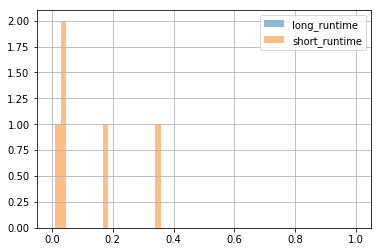

In [22]:
df.popularity[long_runtime].hist(alpha=0.5, bins=20, label='long_runtime')
df.popularity[short_runtime].hist(alpha=0.5, bins=20, label='short_runtime')
plt.legend();

### Vote Average and Popularity

> We assumed higher the movie vote average the more popular.

In [23]:
voted = df.vote_average  == True
low_vote = df.vote_average == False

In [24]:
df.popularity[voted].mean()

nan

In [25]:
df.popularity[low_vote].mean()

nan

> My code shows NaN on vote average. Very strange. It looks like the vote average of a movie has nothing to do with the popularit of a movie.

<a id='conclusions'></a>
## Conclusions

> I cannot conclude anything yet, because all of my speculations turned out to be irrelevant. I suspect there is flaws in my code or my calculations.